# CLASSIFICATION

In [4]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# this is probably the default, but just in case
%matplotlib inline

## Dot Product as a basis for classification
In the diagram below we plot a number of points from two different classes - one set are teal, one set are red. For simplicity they're plotted such that all of the teal points lie on the right-hand side of the y-axis, while all of the red points lie on the left-hand side. </p>

In this example the vertical Y-Axis acts as a dividing line between these two classes of points - known as the decision boundary.</p>
 The question is, if we have a set of points from different classes - is there a way to mathematically find a line tht divides them according to their class (assuming they are separable)?

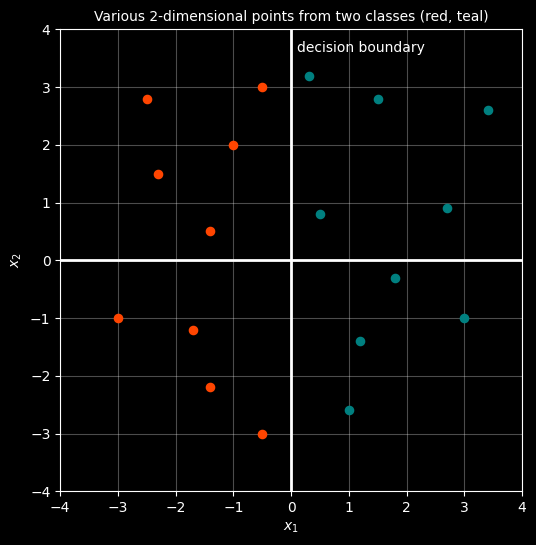

In [5]:
# Example points: teal in Q1 & Q4 (x1>0), red in Q2 & Q3 (x1<0)
teal_pts = np.array([
    [ 0.3,  3.2],   # Q1 - POINT A
    [1.5, 2.8],
    [ 3.4,  2.6],   # Q1
    [ 1.0, -2.6],   # Q4
    [ 3.0, -1.0],   # Q4
    [0.5, 0.8],
    [1.2, -1.4],
    [2.7, 0.9],
    [1.8, -0.3]
])

red_pts = np.array([
    [-1.0,  2.0],   # Q2 - POINT A
    [-0.5, 3.0],
    [-2.3,  1.5],   # Q2
    [-1.7, -1.2],   # Q3
    [-1.4, -2.2],   # Q3
    [-3.0, -1.0],   # Q3
    [-0.5, -3],
    [-1.4, 0.5],
    [-2.5, 2.8]
])

with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 6))

    # plot points
    ax.scatter(teal_pts[:,0], teal_pts[:,1], s=35, color="teal", zorder=3)
    ax.scatter(red_pts[:,0],  red_pts[:,1],  s=35, color="orangered", zorder=3)
    
    # pot the axes + grid
    ax.axhline(0, color="white", linewidth=2)
    ax.axvline(0, color="white", linewidth=2)
    ax.text(0.1, 3.6, r"decision boundary", color="white", fontsize=10)
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.grid(True, alpha=0.3)

    # add labels
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_title(r"Various 2-dimensional points from two classes (red, teal)", fontsize="10")

plt.show()


In this next cell I've coloured the decision boundary yellow - that's just the line that correctly separates the red from the teal points (I could also have chosen other lines). I've also added another vector, $W$. This is called the 'Weights vector'. By defintion this is perpendiclar to the decision boundary. </p>

What's intersting is that for every teal point, when you calculate their vector dot products with W - they're all positive results! All the red points have a NEGATIVE dot product.</p>

This holds the key to classification. <p>

So in fact what a Machine Learning algorithm will do is try to find a weights vector, $W$ which, when dotproduct with points of one class gives a positive result and a negative result against the other. The decision boundary is then the line perpendiculr to $W$!

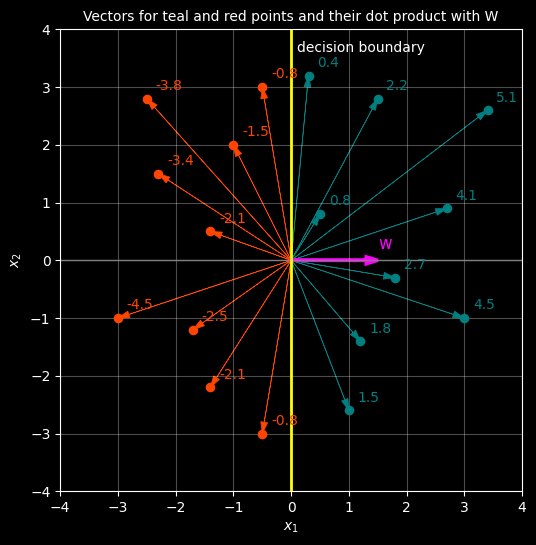

In [6]:
#
# NOTE
# Run the previous cell first
#

show_vector_lines = True
show_dot_products = True


# identify a wieghts vecgor for illustration
w = np.array([1.5, 0.0])

with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 6))

    # plot points
    ax.scatter(teal_pts[:,0], teal_pts[:,1], s=35, color="teal", zorder=3)
    ax.scatter(red_pts[:,0],  red_pts[:,1],  s=35, color="orangered", zorder=3)
    
    # axes + grid
    ax.axhline(0, color="grey", linewidth=1)
    ax.axvline(0, color="yellow", linewidth=2)
 
    ax.text(0.1, 3.6, r"decision boundary", color="white", fontsize=10)
    
    # arrows from origin to each point
    if show_vector_lines:
        for pt in teal_pts:
            ax.arrow(0, 0, pt[0], pt[1], length_includes_head=True, head_width=0.12, head_length=0.2, linewidth=0.5, color="teal")
        for pt in red_pts:
            ax.arrow(0, 0, pt[0], pt[1], length_includes_head=True, head_width=0.12, head_length=0.2, linewidth=0.5, color="orangered")
        # Weight vector (perpendicular to boundary)
        ax.arrow(0, 0, w[0], w[1], length_includes_head=True, head_width=0.12, head_length=0.2, linewidth=2.5, color="fuchsia")
        ax.text(1.5, 0.2, "w", color="fuchsia", fontsize=12)

    
    # Compute dot product of each point with W, the vecror perpendicular to the Y-Axis decision boundary
    if show_dot_products:
        teal_scores = teal_pts @ w
        red_scores = red_pts @ w
        for x, s in zip(teal_pts, teal_scores):
            ax.text(x[0] + 0.15, x[1] + 0.15, f"{s:.1f}", color="teal", fontsize=10)
        for x, s in zip(red_pts, red_scores):
            ax.text(x[0] + 0.15, x[1] + 0.15, f"{s:.1f}", color="orangered", fontsize=10)

    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.grid(True, alpha=0.3)

    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_title(r"Vectors for teal and red points and their dot product with W", fontsize="10")

plt.show()

## Perceptron Algorithm
The perceptron algorithm is a classic approach to finding a decision boundary on a set of points that are linearly separable. It works by starting with a weights vector and initiatlising it to [0,0], working out the dot products and scoring how many classificaitons it got incorrect. It then makes a change to the Weights vector and tries again. It keeps going until it successfully find a W that works and the decisoin boundary is then perpendicular to that W vector.</p>

Note that it may not choose the BEST solutoin, but if the points can be separated it is guaranteed to work.


EPOCH 1
Weight vector: w = [0.17807853 0.01441715]
Total misclassifications: 2

All Predictions:
Idx   Point                Actual     Predicted  Dot Prod     Status    
----------------------------------------------------------------------
0     [0.6 3.2]            teal       red        -0.135       ✗ WRONG   
1     [1.5 2.8]            teal       teal       0.885        ✓ CORRECT 
2     [3.4 2.6]            teal       teal       0.979        ✓ CORRECT 
3     [ 1.  -2.6]          teal       red        -0.635       ✗ WRONG   
4     [ 3. -1.]            teal       teal       0.520        ✓ CORRECT 
5     [0.5 0.8]            teal       teal       0.101        ✓ CORRECT 
6     [ 1.2 -1.4]          teal       teal       0.194        ✓ CORRECT 
7     [2.7 0.9]            teal       teal       0.494        ✓ CORRECT 
8     [ 1.8 -0.3]          teal       teal       0.316        ✓ CORRECT 
9     [-1.  2.]            red        red        -0.149       ✓ CORRECT 
10    [-0.5  3. ]          r

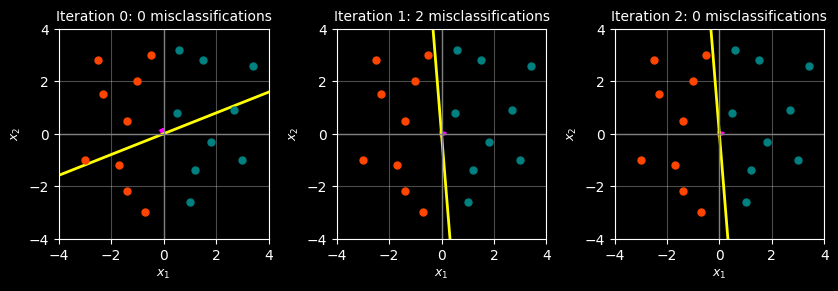


Final weight vector: [0.17807853 0.01441715]


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
teal_pts = np.array([
    [ 0.6,  3.2],
    [1.5, 2.8],
    [ 3.4,  2.6],
    [ 1.0, -2.6],
    [ 3.0, -1.0],
    [0.5, 0.8],
    [1.2, -1.4],
    [2.7, 0.9],
    [1.8, -0.3]
])

red_pts = np.array([
    [-1.0,  2.0],
    [-0.5, 3.0],
    [-2.3,  1.5],
    [-1.7, -1.2],
    [-1.4, -2.2],
    [-3.0, -1.0],
    [-0.7, -3],
    [-1.4, 0.5],
    [-2.5, 2.8]
])

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
        self.w = np.random.randn(2) * 0.1  # Random initialization of W - hence you get different results each time
        self.history = [self.w.copy()]
    
    # calculate the dotproduct of the current W with the current point and 
    # return '1' for a positive result and '-1' for a negative result
    def predict(self, x):
        """Return 1 if w^T x >= 0, else -1"""
        dot_prod = np.dot(self.w, x)
        return 1 if dot_prod >= 0 else -1
    
    # training loop where we loop through each set of points and the labels provided (Y)
    def train_epoch(self, X, y):
        """Train for one epoch, return number of misclassifications and details"""
        mistakes = 0
        mistake_details = []
        all_predictions = []
        
        for idx, (xi, yi) in enumerate(zip(X, y)):
            dot_prod = np.dot(self.w, xi)
            pred = self.predict(xi)
            actual_label = "teal" if yi == 1 else "red"
            pred_label = "teal" if pred == 1 else "red"
            is_correct = pred == yi
            
            all_predictions.append({
                'idx': idx,
                'point': xi,
                'actual': actual_label,
                'predicted': pred_label,
                'dot_product': dot_prod,
                'correct': is_correct
            })
            
            # this basically says that if the predicted label is not the same as the actual label in Y
            # then tweak W
            if not is_correct:
                # Update: w = w + lr * yi * xi
                self.w += self.lr * yi * xi
                mistakes += 1
                mistake_details.append(all_predictions[-1])
        
        self.history.append(self.w.copy())
        return mistakes, mistake_details, all_predictions

# Here we just convert our points into a matrix
X = np.vstack([teal_pts, red_pts])
# and rather than using colours to identyf classes we use number 1 for teal and -1 for red
y = np.hstack([np.ones(len(teal_pts)), -np.ones(len(red_pts))])

# Create an instance of the Perceptron class
perceptron = Perceptron(learning_rate=0.1)
mistakes_per_epoch = [0]  # Initial state has 0 mistakes before training

# Now train on each point
for epoch in range(10):  # Allow up to 10 iterations
    mistakes, mistake_details, all_predictions = perceptron.train_epoch(X, y)
    mistakes_per_epoch.append(mistakes)
    
    print(f"\n{'='*70}")
    print(f"EPOCH {epoch+1}")
    print(f"{'='*70}")
    print(f"Weight vector: w = {perceptron.w}")
    print(f"Total misclassifications: {mistakes}\n")
    
    # Show all predictions
    print("All Predictions:")
    print(f"{'Idx':<5} {'Point':<20} {'Actual':<10} {'Predicted':<10} {'Dot Prod':<12} {'Status':<10}")
    print("-" * 70)
    for pred in all_predictions:
        status = "✓ CORRECT" if pred['correct'] else "✗ WRONG"
        print(f"{pred['idx']:<5} {str(pred['point']):<20} {pred['actual']:<10} {pred['predicted']:<10} {pred['dot_product']:<12.3f} {status:<10}")
    
    # Show misclassifications in detail
    if mistake_details:
        print(f"\nMisclassified points (that were corrected):")
        print("-" * 70)
        for detail in mistake_details:
            print(f"  Point {detail['idx']}: {detail['point']} -> "
                  f"Predicted {detail['predicted']}, but was actually {detail['actual']} "
                  f"(dot product: {detail['dot_product']:.3f})")
    else:
        print("\n✓ NO MISCLASSIFICATIONS - CONVERGED!")
    
    if mistakes == 0:
        print(f"\nConverged after {epoch+1} epochs!")
        break

# Visualize iterations until convergence
num_iterations = len(perceptron.history)
cols = 5
rows = (num_iterations + cols - 1) // cols  # Calculate rows needed

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(rows, cols, figsize=(14, 3*rows))
    axes = axes.flatten()
    
    for iteration, (w, mistakes) in enumerate(zip(perceptron.history, mistakes_per_epoch)):
        ax = axes[iteration]
        
        # Plot points
        ax.scatter(teal_pts[:,0], teal_pts[:,1], s=25, color="teal", zorder=3)
        ax.scatter(red_pts[:,0],  red_pts[:,1],  s=25, color="orangered", zorder=3)
        
        # Decision boundary: w^T x = 0
        x_range = np.linspace(-4, 4, 100)
        
        if abs(w[1]) > 0.01:  # w2 is not ~0
            x2_boundary = -(w[0] / w[1]) * x_range
            ax.plot(x_range, x2_boundary, color="yellow", linewidth=2)
        else:  # boundary is vertical
            ax.axvline(0, color="yellow", linewidth=2)
        
        # Weight vector
        ax.arrow(0, 0, w[0], w[1],
                 length_includes_head=True,
                 head_width=0.12, head_length=0.2,
                 linewidth=2, color="fuchsia")
        
        # Axes and grid
        ax.axhline(0, color="grey", linewidth=1)
        ax.axvline(0, color="grey", linewidth=1)
        ax.set_aspect("equal", adjustable="box")
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
        ax.grid(True, alpha=0.3)
        ax.set_xlabel(r"$x_1$", fontsize=9)
        ax.set_ylabel(r"$x_2$", fontsize=9)
        ax.set_title(f"Iteration {iteration}: {mistakes} misclassifications", fontsize=10)
    
    # Hide unused subplots
    for idx in range(num_iterations, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print(f"\n{'='*70}")
print(f"Final weight vector: {perceptron.w}")
print(f"{'='*70}")

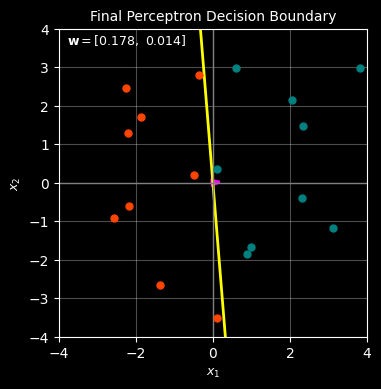

In [26]:
# --- Final perceptron result (4x4, same style, with visual-only jitter) ---

import matplotlib.pyplot as plt
import numpy as np

w = perceptron.w  # final weight vector


with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(4, 4))

    # Points (jittered only for display)
    ax.scatter(teal_plot[:, 0], teal_plot[:, 1], s=25, color="teal", zorder=3)
    ax.scatter(red_plot[:, 0],  red_plot[:, 1],  s=25, color="orangered", zorder=3)

    # Decision boundary: w^T x = 0
    if abs(w[1]) > 0.01:
        x = [-4, 4]
        y = [-(w[0] / w[1]) * xi for xi in x]
        ax.plot(x, y, color="yellow", linewidth=2)
    else:
        ax.axvline(0, color="yellow", linewidth=2)

    # Weight vector
    ax.arrow(
        0, 0, w[0], w[1],
        length_includes_head=True,
        head_width=0.12, head_length=0.2,
        linewidth=2, color="fuchsia"
    )

    # Axes & grid
    ax.axhline(0, color="grey", linewidth=1)
    ax.axvline(0, color="grey", linewidth=1)
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x_1$", fontsize=9)
    ax.set_ylabel(r"$x_2$", fontsize=9)

    # Title
    ax.set_title("Final Perceptron Decision Boundary", fontsize=10)

    # Final parameters inside the plot
    ax.text(
        -3.8, 3.6,
        rf"$\mathbf{{w}} = [{w[0]:.3f},\ {w[1]:.3f}]$",
        fontsize=9,
        color="white"
    )

    plt.show()


## A more complex example

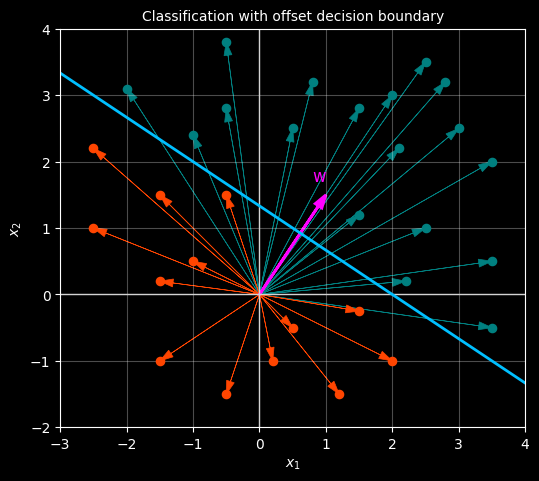

In [10]:
# CONFIG
show_decision_boundary = True
show_vector_lines = True
show_dot_products = False
show_bias = True  # NEW CONFIG

# Weight vector and bias for tilted boundary
w = np.array([1.0, 1.5])
b = -2.0  # bias: decision boundary is w^T x + b = 0

# More points: teal above/right of boundary, red below/left
teal_pts = np.array([
    [ 2.0,  3.0],
    [ 3.0,  2.5],
    [ 2.5,  3.5],
    [ 3.5,  2.0],
    [ 1.5,  2.8],
    [ 2.8,  3.2],
    [-2, 3.1],
    [-1, 2.4],
    [-0.5, 3.8],
    [2.5, 1.0],
    [3.5, 0.5],
    [0.5, 2.5],
    [1.5, 1.2],
    [2.1, 2.2],
    [3.5, -0.5],
    [0.8, 3.2],
    [-0.5, 2.8],
    [2.2, 0.2]
])

red_pts = np.array([
    [-0.5, 1.5],
    [-1.0,  0.5],
    [-2.5,  1.0],
    [ 0.5, -0.5],
    [-1.5,  0.2],
    [ 0.2, -1.0],
    [-1.5, 1.5],
    [-2.5, 2.2],
    [-1.5, -1],
    [-0.5, -1.5],
    [2,-1],
    [1.5, -.25],
    [1.2, -1.5],
])

# Compute dot products
teal_scores = teal_pts @ w + b
red_scores = red_pts @ w + b

with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # plot points
    ax.scatter(teal_pts[:,0], teal_pts[:,1], s=35, color="teal", zorder=3)
    ax.scatter(red_pts[:,0],  red_pts[:,1],  s=35, color="orangered", zorder=3)
    
    # arrows from origin to each point
    if show_vector_lines:
        for pt in teal_pts:
            ax.arrow(0, 0, pt[0], pt[1], length_includes_head=True, head_width=0.12, head_length=0.2, linewidth=0.5, color="teal")
        for pt in red_pts:
            ax.arrow(0, 0, pt[0], pt[1], length_includes_head=True, head_width=0.12, head_length=0.2, linewidth=0.5, color="orangered")
    
    # axes + grid
    ax.axhline(0, color="lightgray", linewidth=1)
    ax.axvline(0, color="lightgray", linewidth=1)
    
    
    if show_decision_boundary:
        # Decision boundary: w^T x + b = 0 => x2 = -(w[0]*x1 + b) / w[1]
        x1_range = np.linspace(-3, 4, 100)
        x2_boundary = -(w[0] * x1_range + b) / w[1]
        ax.plot(x1_range, x2_boundary, color="deepskyblue", linewidth=2)
        
        # Weight vector (perpendicular to boundary)
        ax.arrow(0, 0, w[0], w[1],
                 length_includes_head=True,
                 head_width=0.12, head_length=0.2,
                 linewidth=2, color="fuchsia")
        ax.text(w[0] - 0.2, w[1] + 0.2, "w", color="fuchsia", fontsize=12)
            
    # annotate scores
    if show_dot_products:
        for x, s in zip(teal_pts, teal_scores):
            ax.text(x[0] + 0.15, x[1] + 0.15, f"{s:.1f}", color="teal", fontsize=10)
        for x, s in zip(red_pts, red_scores):
            ax.text(x[0] + 0.15, x[1] + 0.15, f"{s:.1f}", color="orangered", fontsize=10)
    
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(-3, 4)
    ax.set_ylim(-2, 4)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_title(r"Classification with offset decision boundary", fontsize="10")
    
    plt.show()

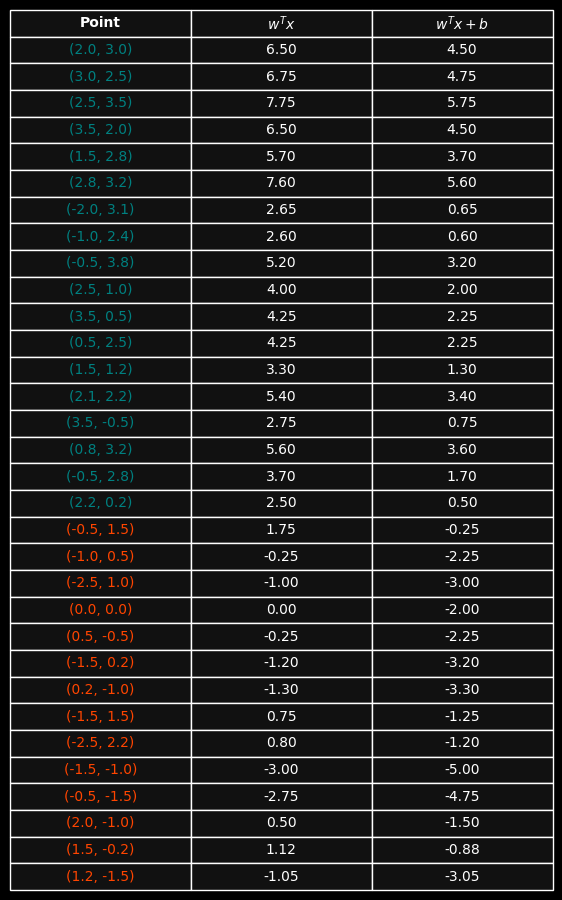

In [9]:
# Create table data
all_pts = np.vstack([teal_pts, red_pts])
all_colors = ['teal'] * len(teal_pts) + ['orangered'] * len(red_pts)
all_scores_w = all_pts @ w
all_scores_w_b = all_pts @ w + b

# Prepare table data
table_data = []
colors = []
for i, (pt, color) in enumerate(zip(all_pts, all_colors)):
    table_data.append([
        f"({pt[0]:.1f}, {pt[1]:.1f})",
        f"{all_scores_w[i]:.2f}",
        f"{all_scores_w_b[i]:.2f}"
    ])
    colors.append(color)

# Create table
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(figsize=(7, 8))
    ax.axis("off")
    
    table = ax.table(
        cellText=table_data,
        colLabels=["Point", r"$w^T x$", r"$w^T x + b$"],
        cellLoc="center",
        colLoc="center",
        loc="center"
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.0, 1.6)
    
    # Style cells
    for (row, col), cell in table.get_celld().items():
        cell.set_edgecolor("white")
        cell.set_linewidth(1.0)
        cell.set_facecolor("#111111")
        
        # Header row
        if row == 0:
            cell.get_text().set_color("white")
            cell.get_text().set_fontweight("bold")
        # First column: colour matches point colour
        elif col == 0:
            cell.get_text().set_color(colors[row - 1])
        # Other columns
        else:
            cell.get_text().set_color("white")
    
    plt.show()